In [250]:
import pandas as pd
iris_data = pd.read_csv('./Iris.csv')

In [251]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [252]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [253]:
y = iris_data['Species']

In [254]:
# Remove Id column 
iris_data = iris_data.drop("Id", axis=True)

In [255]:
iris_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [256]:
# count the number of flowers for each species.
iris_data.groupby('Species').count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [257]:
def convertToDigit(flower_type):
    
    if (flower_type == "Iris-setosa"):
        return 0
    elif (flower_type == "Iris-versicolor"):
        return 1
    elif (flower_type == "Iris-virginica"):
        return 2
    


iris_data['Species'] = iris_data['Species'].apply(convertToDigit)


In [258]:
y = iris_data['Species']

In [259]:
iris_data = iris_data.drop("Species", axis=True)

In [260]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [262]:
import random
def train_validate_test_split(X_data, Y_data, test_size: None | float = None,validate_size: None | float = None, train_size: None | float = None, shuffle: bool = True, random_state: None | int = None ) -> list:
    
    
    
    if len(X_data) != len(Y_data):
        raise Exception("list size does not match")
    

    X_train = []
    X_test = []
    X_validate = []
    y_train = []
    y_test = []
    y_validate = []
    
    if shuffle or random_state is not None:
        if random_state is not None:
            random.seed(random_state)
        # combine the two list togther and then (column based) all rows included with random state if is not none
        all = pd.concat([X_data, Y_data], axis=1).sample(frac=1, random_state=random_state).reset_index(drop=True)
        X_data, Y_data = all.iloc[:, :-1], all.iloc[:, -1] 
        
        
    train_index = 0    
    if test_size is not None and validate_size is not None and train_size is not None:
        if train_size + test_size + validate_size != 1:
            raise Exception("percentages are invalid")
        else:
            train_index = int(len(X_data) * train_size)  
 
    elif test_size is None and validate_size is None and train_size is None:
        test_size = 0.3
        validate_size = 0.3
        train_size = 0.4
        train_index = int(len(X_data) * train_size)
        
    elif test_size is not None:
        validate_size=validate_size or 0
        train_size = 1 - test_size + validate_size
        print(test_size)
        print(validate_size)
        print(train_size)
        train_index = int(len(X_data) * train_size)
         
    elif train_size is not None:
        validate_size=validate_size or 0
        test_size = 1 - train_size + validate_size
        train_index = int(len(X_data) * train_size)
        

    validate_index = train_index + int(len(X_data) * validate_size)
    X_train,X_validate, X_test = X_data.iloc[:train_index, :],X_data.iloc[train_index:validate_index,:], X_data.iloc[validate_index:, :]
    y_train,y_validate, y_test = Y_data.iloc[:train_index],Y_data.iloc[train_index:validate_index], Y_data.iloc[validate_index:]   
    
    return X_train,X_validate, X_test, y_train,y_validate, y_test    
    
y

X_train,X_validate, X_test, Y_train,Y_validate, Y_test = train_validate_test_split(iris_data, y, train_size=.75,validate_size=0.12, random_state=42) # work
# X_train, X_test, y_train, y_test = train_test_split(iris_data, y, test_size=.25) # work
# X_train, X_test, y_train, y_test = train_test_split(iris_data, y, train_size=.75, test_size=.25) # work
# X_train, X_test, y_train, y_test = train_test_split(iris_data, y, test_size=.3,train_size=.75) # should give a error


[referenece](https://stackoverflow.com/questions/49556753/how-to-slice-a-list-into-3-parts-based-on-percentage)

In [264]:
print(f"Train data size: {len(X_train)}")
print(f"Train validate data size: {len(X_validate)}")
print(f"test data size: {len(X_test)}")
print(f"target data of train data size: {len(Y_train)}")
print(f"target data of validate size: {len(Y_validate)}")
print(f"target data of test data size: {len(Y_test)}")

Train data size: 112
Train validate data size: 18
test data size: 20
target data of train data size: 112
target data of validate size: 18
target data of test data size: 20


In [265]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
# TODO: replace it with home made accuracy
#from sklearn.metrics import accuracy_score
#accuracy_score(prediction,Y_test)
#help(accuracy_score)
def homemade_accuracy(preddata,realdata):
    if(len(preddata)!=len(realdata)):
       print("warning, data sizes don't match")
    else:
             counter=0
             for i in range (len(preddata)):
                 if(preddata[i]==realdata.iloc[i]):
                     counter+=1
    accuracy=counter/len(preddata)
    return accuracy

homemade_accuracy(prediction,Y_test)

0.9

In [266]:
import seaborn as sns
import matplotlib.pyplot as matp
from sklearn.datasets import make_blobs
aba= pd.read_csv('./Iris.csv')
species1 = aba.loc[aba["Species"] == "Iris-setosa"]
species2 = aba.loc[aba["Species"] == "Iris-versicolor"]
species3 = aba.loc[aba["Species"] == "Iris-virginica"]
spec12= aba.loc[(aba["Species"]== "Iris-setosa") | (aba["Species"]== "Iris-versicolor")] 
spec23= aba.loc[(aba["Species"]== "Iris-versicolor") | (aba["Species"]== "Iris-virginica")] 
spec31= aba.loc[(aba["Species"]== "Iris-virginica") | (aba["Species"]== "Iris-setosa")] 

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

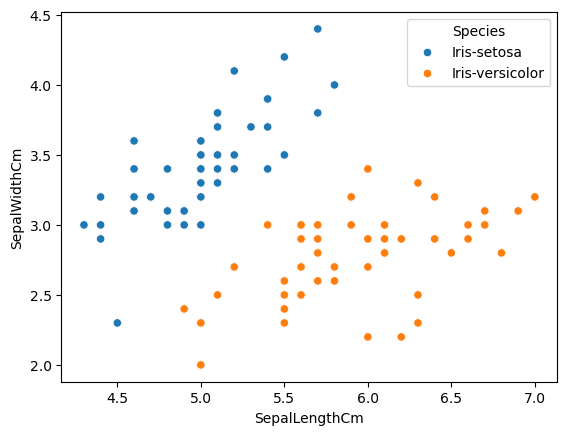

In [267]:
P, Q = make_blobs(n_samples=1000, n_features=4, random_state=26, cluster_std=3)
#SepalLengthCm 	SepalWidthCm 	PetalLengthCm 	PetalWidthCm
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue='Species', data=spec12)


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

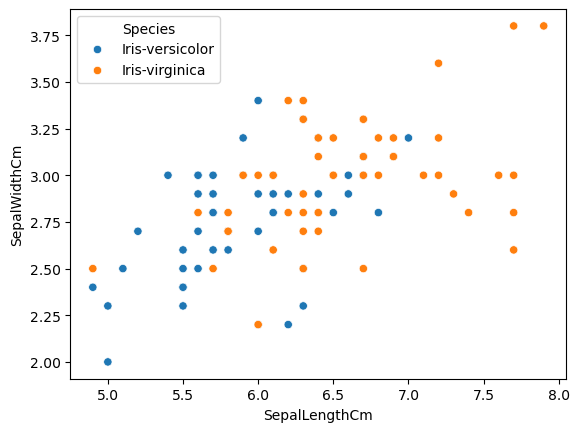

In [268]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue='Species', data=spec23)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

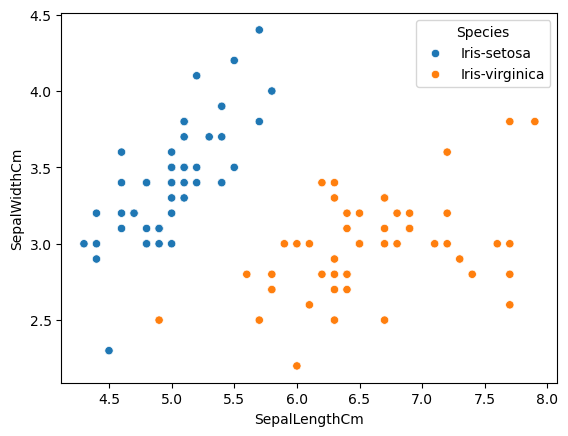

In [269]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue='Species', data=spec31)

In [292]:
#Y_test.head()
min1, max1 =X_test.iloc[:, 0].min()-1, X_test.iloc[:, 0].max()+1
min2, max2 = X_test.iloc[:, 1].min()-1, X_test.iloc[:, 1].max()+1
min3, max3 = X_test.iloc[:, 2].min()-1, X_test.iloc[:, 2].max()+1
min4, max4 = X_test.iloc[:, 3].min()-1, X_test.iloc[:, 3].max()+1

In [304]:
import numpy as np
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
x3grid = np.arange(min3, max2, 0.1)
x4grid = np.arange(min4, max2, 0.1)

In [306]:
xx, yy, zz, ww = np.meshgrid(x1grid, x2grid, x3grid, x4grid)

In [308]:
r1, r2, r3, r4 = xx.flatten(), yy.flatten(), zz.flatten(), ww.flatten()
r1, r2, r3, r4 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1)), r3.reshape((len(r3), 1)), r4.reshape((len(r4), 1))

In [310]:
grid = np.hstack((r1,r2, r3, r4))

In [318]:
yhat = model.predict(grid)
# grid

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
